Estimating the Alfven Mach Number ($M_A$) using the three methods reported in [Maguire et al. (2020)](https://www.aanda.org/articles/aa/full_html/2020/01/aa36449-19/aa36449-19.html)

In [27]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import sunpy
from sunpy.map import Map
from sunpy.coordinates import sun
from sunpy.coordinates import frames
from sunpy.coordinates import SphericalScreen
from sunpy.sun import constants as const
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter
import astropy.units as u
import astropy.io.fits as fits
import astropy.constants as astro_const
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, LogStretch, PercentileInterval

# Construct the full path to the scripts directory
script_path = os.path.abspath('./scripts')

# Add the scripts directory to sys.path
import sys
if script_path not in sys.path:
    sys.path.append(script_path)

import fwdtools as fwd
import solar_data_utils as myfuncs
# Reload to update with new changes
import importlib
importlib.reload(fwd)
importlib.reload(myfuncs)

# set the directory path where the data is importe/stored
data_dir = '/home/mnedal/data'

### Load SUVI images

In [2]:
suvi_map_objects  = myfuncs.load_suvi(data_dir=data_dir,
                                      start='2024-05-14T17:00:00',
                                      end='2024-05-14T18:00:00',
                                      channel=195)                  # load SUVI data files
clean_suvi_maps   = myfuncs.remove_redundant_maps(suvi_map_objects) # remove redundant images
suvi_seq_runratio = myfuncs.apply_runratio(clean_suvi_maps)         # make running ratio maps

for m in suvi_seq_runratio:
    m.plot_settings['norm'] = colors.Normalize(vmin=0.7, vmax=1.3)  # normalize the intensity range

SUVI image 0 is done
SUVI image 1 is done
SUVI image 2 is done
SUVI image 3 is done
SUVI image 4 is done
SUVI image 5 is done
SUVI image 6 is done
SUVI image 7 is done
SUVI image 8 is done
SUVI image 9 is done
SUVI image 10 is done
SUVI image 11 is done
SUVI image 12 is done
SUVI image 13 is done
SUVI image 14 is done
SUVI image 15 is done
SUVI image 16 is done
SUVI image 17 is done
SUVI image 18 is done
SUVI image 19 is done
SUVI image 20 is done
SUVI image 21 is done


### Load LASCO C2 images

In [3]:
lasco_c2_map_objects = myfuncs.load_lasco(data_dir=data_dir,
                                          start='2024-05-14T17:30:00',
                                          end='2024-05-14T20:00:00',
                                          detector='C2')                   # load LASCO C2 data files
clean_maps_c2        = myfuncs.remove_redundant_maps(lasco_c2_map_objects) # remove redundant images
m_seq_runratio_c2    = myfuncs.apply_runratio(clean_maps_c2)               # make running ratio maps

print(f'Before:\nLASCO C2: {len(lasco_c2_map_objects)} images\n')
print(f'After:\nLASCO C2: {len(clean_maps_c2)} images')

LASCO C2 image 0 is done
LASCO C2 image 1 is done
LASCO C2 image 2 is done
LASCO C2 image 3 is done
LASCO C2 image 4 is done
LASCO C2 image 5 is done
LASCO C2 image 6 is done
LASCO C2 image 7 is done
LASCO C2 image 8 is done
LASCO C2 image 9 is done
LASCO C2 image 10 is done
LASCO C2 image 11 is done
LASCO C2 image 12 is done
LASCO C2 image 13 is done
LASCO C2 image 14 is done
LASCO C2 image 15 is done
LASCO C2 image 16 is done
LASCO C2 image 17 is done
LASCO C2 image 18 is done
LASCO C2 image 19 is done
LASCO C2 image 20 is done
LASCO C2 image 21 is done
LASCO C2 image 22 is done
LASCO C2 image 23 is done
LASCO C2 image 24 is done
LASCO C2 image 25 is done
LASCO C2 image 26 is done
LASCO C2 image 27 is done
LASCO C2 image 28 is done
LASCO C2 image 29 is done
LASCO C2 image 30 is done
LASCO C2 image 31 is done
LASCO C2 image 32 is done
LASCO C2 image 33 is done
LASCO C2 image 34 is done
LASCO C2 image 35 is done
LASCO C2 image 36 is done
LASCO C2 image 37 is done
LASCO C2 image 38 is d

### Preview maps

2025-04-15 18:03:30 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-04-15 18:03:30 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


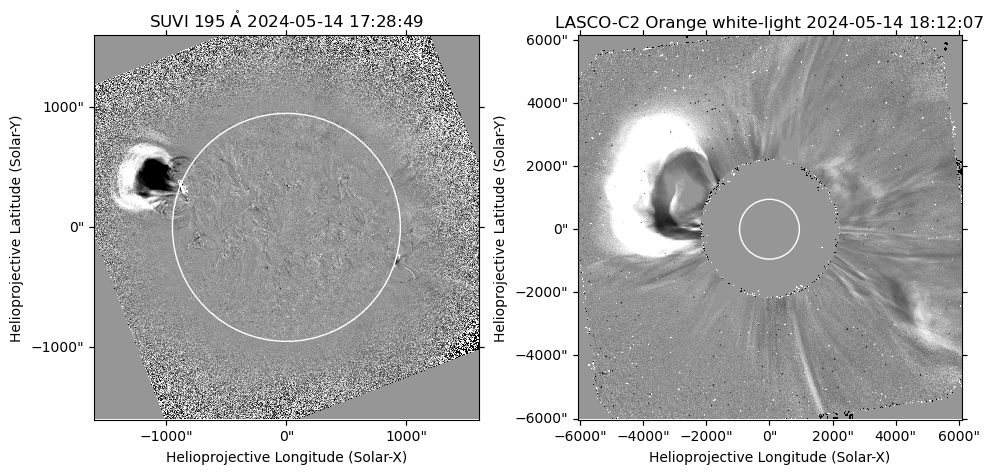

In [12]:
m_suvi = suvi_seq_runratio[6]
m_c2   = m_seq_runratio_c2[3]

fig = plt.figure(figsize=[10,5])

ax  = fig.add_subplot(121, projection=m_suvi)
m_suvi.plot(axes=ax)
m_suvi.draw_limb()
ax.grid(False)

ax  = fig.add_subplot(122, projection=m_c2)
m_c2.plot(axes=ax)
m_c2.draw_limb()
ax.grid(False)

fig.tight_layout()
plt.show()

### Show the radial slits

2025-04-15 18:10:44 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


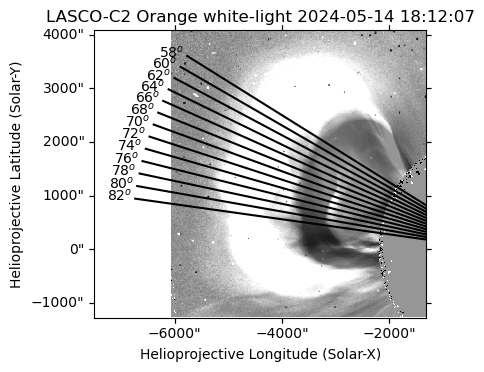

In [13]:
centered_list = myfuncs.generate_centered_list(160, 2, 6)

fig = plt.figure(figsize=[7,7])
ax  = fig.add_subplot(111, projection=m_c2)
img = m_c2.plot(axes=ax)
m_c2.draw_limb()
ax.grid(False)

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=6800, map_obj=m_c2)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = m_c2.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=m_c2.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value - 25, end_point_pixel.y.value + 5, f'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

ax.set_xlim(left=-120, right=400)
ax.set_ylim(bottom=400, top=850)
fig.tight_layout()
plt.show()

### Load PSI-MAS FORWARD maps

In [14]:
file_paths = sorted(glob.glob(f'{data_dir}/FORWARD/*.sav'))
print(*file_paths, sep='\n')

/home/mnedal/data/FORWARD/AIA_20240514_1710_193_512_rfilter.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_BETA_2460559.9840394disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_BMAG_2460559.9356944disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_DENS_2460559.9343750disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_PTOT_2460559.9832407disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_TEMP_2460559.9822801disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VPH_2460593.4820486disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VR_2460593.4744676disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VTH_2460593.4788194disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VX_2460593.5005556disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VY_2460593.5060301disk.sav
/home/mnedal/data/FORWARD/psimas_PHYSICAL_DIAGNOSTICS_VZ_2460593.5081481disk.sav


In [22]:
for file in file_paths:
    if 'BMAG' in file:
        bmag = myfuncs.get_forward_map(file)
    elif 'DENS' in file:
        dens = myfuncs.get_forward_map(file)
    elif 'BETA' in file:
        beta = myfuncs.get_forward_map(file)
    elif 'TEMP' in file:
        temp = myfuncs.get_forward_map(file)
    elif 'BR' in file:
        br = myfuncsget_forward_map(file)
    elif 'VR' in file:
        vr = myfuncs.get_forward_map(file)
    elif 'VTH' in file:
        vth = myfuncs.get_forward_map(file)
    elif 'VPH' in file:
        vph = myfuncs.get_forward_map(file)
    elif 'VX' in file:
        vx = myfuncs.get_forward_map(file)
    elif 'VY' in file:
        vy = myfuncs.get_forward_map(file)
    elif 'VZ' in file:
        vz = myfuncs.get_forward_map(file)

In [23]:
# Calculate the Alfven speed map
mp        = astro_const.m_p.to(u.gram).value
valf_cm_s = bmag.data/np.sqrt(4*np.pi*mp*dens.data)
valf_km_s = valf_cm_s * 1e-5
va        = sunpy.map.Map(valf_km_s, dens.meta)

In [ ]:
# Calculate plasma speed
vsw_arr = np.sqrt(vr.data**2 + vth.data**2 + vph.data**2)
vsw     = sunpy.map.Map(vsw_arr, vr.meta)

# Calculate Alfven Mach number
Ma_arr = vsw.data / va.data
Ma     = sunpy.map.Map(Ma_arr, vsw.meta)

In [24]:
# Calculate plasma speed
vsw_arr = np.sqrt(vx.data**2 + vy.data**2 + vz.data**2)
vsw     = sunpy.map.Map(vsw_arr, vx.meta)

# Calculate Alfven Mach number
Ma_arr = vsw.data / va.data
Ma     = sunpy.map.Map(Ma_arr, vsw.meta)

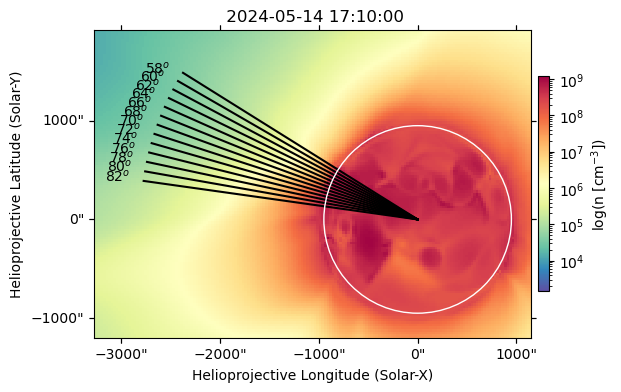

In [37]:
fig = plt.figure(figsize=[10,4])
ax  = fig.add_subplot(projection=dens)
img = dens.plot(axes=ax,
                norm=colors.LogNorm(),
                cmap='Spectral_r')
dens.draw_limb()
ax.grid(False)
plt.colorbar(img, ax=ax, shrink=0.7, pad=0.01, label=r'log(n [cm$^{-3}$])')

sampled_dens = []
sampled_dist = []

for value in centered_list:
    line = myfuncs.plot_line(angle_deg=value, length=2800, map_obj=dens)
    ax.plot_coord(line, color='black')
    # Plot the number at the end of the line
    # Convert SkyCoord to pixel coordinates for plotting text
    line_lon, line_lat = line.Tx, line.Ty
    end_point_pixel = dens.world_to_pixel(SkyCoord(line_lon[1], line_lat[1], frame=dens.coordinate_frame))
    # rename the angles to be position angles, instead of geometric angles
    PA_value = value - 90
    # Display the number at the end point
    ax.text(end_point_pixel.x.value-10, end_point_pixel.y.value+2, rf'{PA_value}$^o$',
            color='black', fontsize=10, ha='center', va='center')

    # sample values along slits
    with SphericalScreen(dens.observer_coordinate):
        traced_loop_pixelated = sunpy.map.pixelate_coord_path(dens, line)
        traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])
    vals = sunpy.map.sample_at_coords(dens, traced_loop_pixelated)
    sampled_dens.append(vals)
    sampled_dist.append(traced_loop_distance.to('arcsec'))

ax.set_xlim(left=130, right=300)
ax.set_ylim(bottom=210, top=330)
fig.tight_layout()
plt.show()

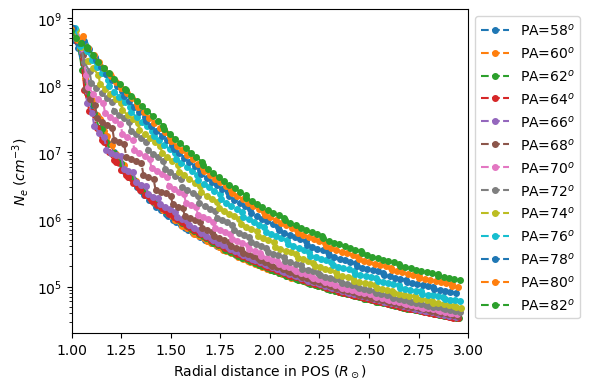

In [39]:
fig = plt.figure(figsize=[6,4])
ax  = fig.add_subplot(111)

for i in range(len(sampled_dens)):
    # rename the angles to be position angles, instead of geometric angles
    PA_value = centered_list[i] - 90
    ax.plot(sampled_dist[i]/dens.rsun_obs.value, sampled_dens[i], 'o--', ms=4, label=rf'PA={PA_value}$^o$')
    ax.set_yscale('log')

ax.legend(bbox_to_anchor=[1, 1])
ax.set_xlabel(r'Radial distance in POS ($R_\odot$)')
ax.set_ylabel(r'$N_e\;(cm^{-3})$')
ax.set_xlim(left=1, right=3)
fig.tight_layout()
plt.show()

### Estimate the Alfven Mach Number with three methods

Method 1: Standoff distance

In [ ]:
gamma = 5/3          # for an ideal mono-atomic gas
gamma = 4/3          # for an ideal mono-atomic relativistic gas

delta = ...          # standoff distance, from the EUV images
Rc    = ...          # radius of curvature of the CME, from the EUV images
d     = delta/Rc     # normalized standoff distance

MA_method1 = np.sqrt(1 + ( 1.24*d - (gamma-1)/(gamma+1) )**-1) # Russell & Mulligan (2002)

Method 2: CME speed to Alfvén speed ratio

In [1]:
vcme = ...    # CME speed
va   = ...    # local background Alfven speed
vsw  = ...    # Parker solution to the solar wind as in Mann et al. (2002) ... from the 2D plane-of-sky map of the MAS model

MA_method2 = (vcme - vsw)/va

Method 3: Band-splitting

In [ ]:
BDW  = df/f                # relative instantaneous bandwidth, from the I-LOFAR dynamic spectra
X    = (BDW + 1)**2        # compression ratio
beta = ...                 # plasma-to-magnetic pressure ratio, from the 2D plane-of-sky map of the MAS model

MA_method3 = np.sqrt( X*(X + 5 + 5*beta) / 2*(4 - X) ) # for a quasi-perpendicular shock, from Vršnak et al. (2002)

Comparison